# Άσκηση 1

### Ερώτημα β

Εδώ λαμβάνουμε υπόψην την αεροδυναμική τριβή λόγω της ατμόσφαιρας της Γης. Συγκεκριμένα έχουμε τη συνάρτηση πυκνότητας $ρ=(0.1Η)^{-7.5} kg/m^3$ για $H>15km $ και $ρ=0.1kg/m^3$ για $H<15km$

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pylab as plt

In [2]:
mu=398600
md=400*10**3
S=8000*10**(-6)
H=400
Rearth=6371
a=H+Rearth
N=6000

T=2*np.pi*np.sqrt(a**3/mu)

In [3]:
def radius(x,y): #υπολογισμός ακτίνας
    return np.sqrt(x**2+y**2)

def rho(height):
    rho=(0.1*height)**(-7.5) if height>15 else 0.1 
    return rho*10**9 

Το διαταραγμένο πρόβλημα λόγω της αεροδυναμικής τριβής:

In [4]:
def rhs_2bp_pert(t,X):
    x,y,vx,vy=X
    r=radius(x,y)
    x_dot=vx
    y_dot=vy
    v=np.sqrt(vx**2+vy**2)
    Cd=1.5
    px=-(1/2)*rho(r-Rearth)*v*x_dot*(Cd*S/md)
    py=-(1/2)*rho(r-Rearth)*v*y_dot*(Cd*S/md)
    vx_dot=-mu*x/(r*r*r) + px
    vy_dot=-mu*y/(r*r*r) + py
    return [x_dot,y_dot,vx_dot,vy_dot]

Θέλουμε να βρούμε σε πόσο χρόνο ο δορυφόρος θα πέσει στην Γη, οπότε θα λύσουμε το σύστημα για 6000 περιφορές και θα χρησιμοποιήσουμε event locator ώστε αν η απόσταση δορυφοόρου-γης μηδενιστεί να σταματήσει η ολοκλήρωση και να μας δώσει το αποτέλεσμα που θέλουμε. Αλλιώς θα χρειαστεί παραπάνω χρόνο και θα πρέπει να αυξήσουμε το tmax.

Ο δορυφόρος πέφτει μετά από  5660.73388750628 περιστροφές, δηλαδή  31387966.53800252 s.


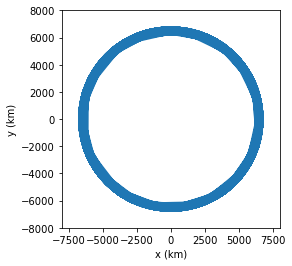

In [5]:
IC=[0,a,-np.sqrt(mu/a),0] #αρχικές συνθήκες

def event(t,X):
    x,y,vx,vy=X
    r=radius(x,y)
    return r-Rearth

event.terminal=True

t0=0
tmax=N*T

sol=solve_ivp(rhs_2bp_pert,[t0,tmax],IC,t_eval=np.linspace(0,tmax,10*N),method='DOP853',events=[event],atol=1e-10,rtol=1e-10)
yy=sol.y
tt=sol.t
tstop=sol.t_events[0][0]
print('Ο δορυφόρος πέφτει μετά από ',tstop/T,'περιστροφές, δηλαδή ',tstop,'s.' )

plt.figure()
plt.plot(yy[0],yy[1])
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(-8000, 8000)
plt.ylim(-8000, 8000)
plt.xlabel("x (km)")
plt.ylabel("y (km)")
plt.show()

Συγκεκριμένα, η τελευταία απόσταση που αποθηκεύεται πριν πέσει στην γη είναι:

In [6]:
print("d=",event(tt[len(tt)-1],yy[:,len(tt)-1]),"km")

d= 20.521485124208994 km
